In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
import pickle
import numpy
import sys

import matplotlib as pl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between
sns.set_style("white")


dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')

from feature_format import featureFormat, targetFeatureSplit

In [59]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 11.
plt.rcParams["axes.titlesize"] = 1.25 * plt.rcParams['font.size']

#Stylistic Options for plots
colors = ["g", "deepskyblue", "r", "m", "k"]

In [60]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open('cleaned_dataset.pkl', "r") )


In [61]:
poi  = "poi"

feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "restricted_stock"

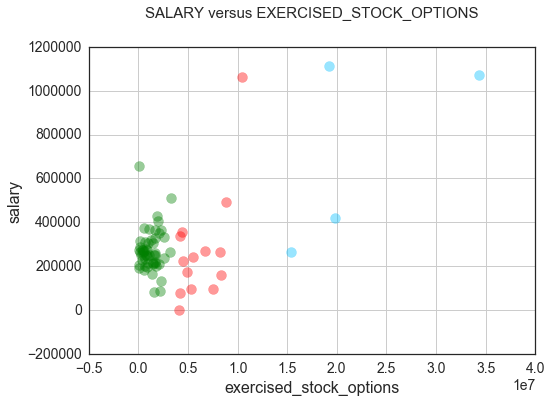

In [65]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 

features_list = [poi, feature_2, feature_1] #
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)
_, finance_features = targetFeatureSplit( data )

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)


for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    plt.scatter(x, y, color = colors[pred[i]], s=100, marker = 'o', alpha = 0.40)
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

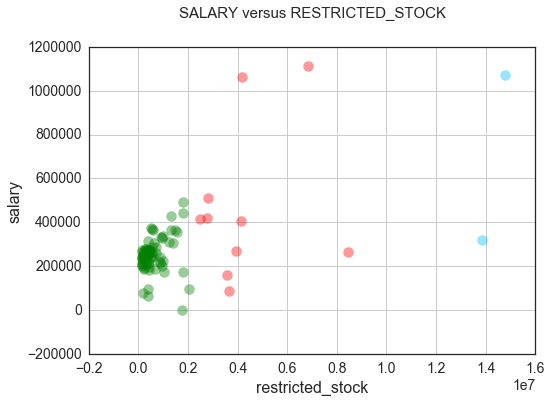

In [67]:
from sklearn.preprocessing import MinMaxScaler 

features_list = [poi, feature_3, feature_1]
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)

_, finance_features = targetFeatureSplit( data )


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)



for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    ax = plt.scatter(x, y, color = colors[pred[i]], s=100, marker = 'o', alpha = 0.40)
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

## Feature Selection

In [26]:
feature_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 
                'bonus', 'restricted_stock_deferred', 'deferred_income', 
                'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
                'long_term_incentive', 
                'restricted_stock', 'director_fees',
                'to_messages','from_poi_to_this_person', 'from_messages', 
                'from_this_person_to_poi', 'shared_receipt_with_poi'
               ]

names = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
        'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
        'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
         'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 
                'from_this_person_to_poi', 'shared_receipt_with_poi']

my_dataset = data_dict
data = featureFormat(my_dataset, feature_list
                     , sort_keys = True)
labels, features = targetFeatureSplit(data)


In [28]:
from sklearn.ensemble import RandomForestClassifier
import operator

def getImportantFeatures(rf, n=1, topNFeatures=5):
    featuresSortedByScore = list()

    for i in range(n):
        rf.fit(features, labels)
        featuresSortedByScore.append(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

    myTopFeature = {}
    for i in range (len(featuresSortedByScore)):
        for j in range (topNFeatures):
            if featuresSortedByScore[i][j][1] not in myTopFeature.keys():
                myTopFeature[featuresSortedByScore[i][j][1]] = 1
            else:
                myTopFeature[featuresSortedByScore[i][j][1]] += 1


    return sorted(myTopFeature.items(), key=operator.itemgetter(1), reverse=True)[:topNFeatures]
    
    
def getImportantFeaturesLasso(rf, n=1, topNFeatures=5):
    featuresSortedByScore = list()

    for i in range(n):
        rf.fit(features, labels)
        featuresSortedByScore.append(sorted(zip(map(lambda x: round(x, 4), rf.scores_), names), 
             reverse=True))

    myTopFeature = {}
    for i in range (len(featuresSortedByScore)):
        for j in range (topNFeatures):
            if featuresSortedByScore[i][j][1] not in myTopFeature.keys():
                myTopFeature[featuresSortedByScore[i][j][1]] = 1
            else:
                myTopFeature[featuresSortedByScore[i][j][1]] += 1


    return sorted(myTopFeature.items(), key=operator.itemgetter(1), reverse=True)[:topNFeatures]

In [31]:
n =1000
topNFeatures = 10
clf = RandomForestClassifier()
theFeatures = getImportantFeatures(clf, n, topNFeatures)



('exercised_stock_options', 944)
('total_stock_value', 903)
('bonus', 886)
('expenses', 877)
('other', 875)
('total_payments', 709)
('restricted_stock', 684)
('deferred_income', 675)
('shared_receipt_with_poi', 674)
('salary', 633)


In [34]:
for item, score in theFeatures:
    print "{:30}{:4}".format(item, score)

exercised_stock_options        944
total_stock_value              903
bonus                          886
expenses                       877
other                          875
total_payments                 709
restricted_stock               684
deferred_income                675
shared_receipt_with_poi        674
salary                         633


In [209]:
feature_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 
                'bonus', 'restricted_stock_deferred', 'deferred_income', 
                'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
                'long_term_incentive', 
                'restricted_stock', 'director_fees',
                'to_messages','from_poi_to_this_person', 'from_messages', 
                'from_this_person_to_poi', 'shared_receipt_with_poi'
               ]

my_dataset = data_dict

data = featureFormat(my_dataset, feature_list, sort_keys = True)
Y, X = targetFeatureSplit(data)

In [210]:
feature_list[1:]

['salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi']

In [211]:
import pandas as pd


In [245]:
from sklearn.cross_validation import StratifiedShuffleSplit

def make_data(dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    
    for train_idx, test_idx in cv: 
        
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
    return features_train, features_test, labels_train, labels_test

In [279]:
folds = 1000
Xtrain, Xtest, Ytrain, Ytest = make_data(my_dataset, feature_list, folds)

In [280]:
X_train = pd.DataFrame(Xtrain)
X_test = pd.DataFrame(Xtest)
X_train.columns = feature_list[1:]
X_test.columns = feature_list[1:]

Y_train = pd.DataFrame({"poi":Ytrain})
Y_test = pd.DataFrame({"poi":Ytest})

In [281]:
len(X_train)

128000

## XGB Classifier

In [261]:
from xgboost import plot_importance
from xgboost import XGBClassifier as XGBC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score

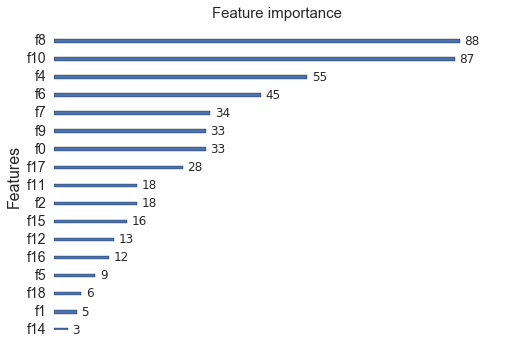

In [262]:

clf_xgb = XGBC(subsample = .8, colsample_bytree = .8, seed = 14, max_depth = 3).fit(X_train, ravel(Y_train))
preds_xgb = clf_xgb.predict_proba(X_test)
ax = plot_importance(clf_xgb.booster(), grid = False)
_ = ax.set(frame_on = False, ylim = (0, len(clf_xgb.booster().get_fscore())), xticklabels = "", xlabel = "")

## Logistic Regression

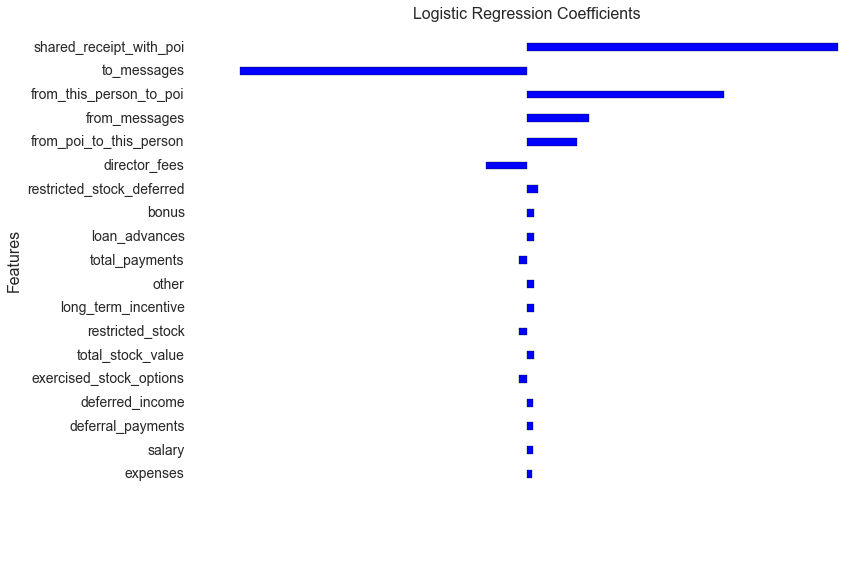

In [241]:
logreg = LogisticRegression(random_state = 14).fit(X_train, ravel(Y_train))
preds_lr = logreg.predict_proba(X_test)

df = pd.DataFrame(list(zip(X_test.columns, logreg.coef_[0])))
df = df.reindex(df[1].abs().sort_values().index).set_index(0)

ax = df.plot.barh(width = .33, legend = "", figsize = (12, 8))
ax.set_title("Logistic Regression Coefficients", y = 1.03, fontsize = 16.)
_ = ax.set(frame_on = False, xlabel = "", xticklabels = "", ylabel = "Features")

for i, label in enumerate(list(df.index)):
    score = df.ix[label][1]
    ax.annotate('%.3f' % score, (score + (-.18 if score < 0 else .02), i - .2), fontsize = 10.5)

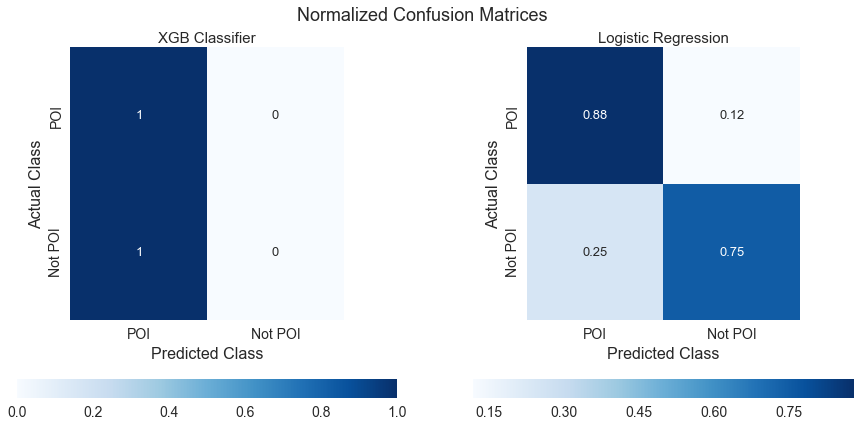

In [242]:

f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Normalized Confusion Matrices", fontsize = 18.)
def make_cm(p, t, axis):
    cm = confusion_matrix(Y_test, np.argmax(p, axis = 1))
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    _ = sns.heatmap(cm, square = True, xticklabels = ["POI", "Not POI"], annot = True,
                    annot_kws = {"fontsize": 13}, yticklabels = ["POI", "Not POI"],
                    cbar = True, cbar_kws = {"orientation": "horizontal"}, ax = ax[axis], cmap = "Blues").set(
        xlabel = "Predicted Class", ylabel = "Actual Class", title = t)
    
    
make_cm(preds_xgb, "XGB Classifier", 0)
make_cm(preds_lr, "Logistic Regression", 1)

In [218]:
print "XGB Classifier Performance" 
print "=" * 26 
print classification_report(Y_test, np.argmax(preds_xgb, axis = 1), target_names = ["POI", "Not POI"])


print("AUC      : %.4f" % roc_auc_score(Y_test, preds_xgb[:, 1]))
print("Accuracy : %.4f" % accuracy_score(Y_test, np.argmax(preds_xgb, axis = 1)))
print("Log Loss : %.4f\n\n" % log_loss(Y_test, preds_xgb[:, 1]))


print "Logistic Regression Performance" 
print "=" * 26 
print classification_report(Y_test, np.argmax(preds_lr, axis = 1), target_names = ["POI", "Not POI"])


print("AUC      : %.4f" % roc_auc_score(Y_test, preds_lr[:, 1]))
print("Accuracy : %.4f" % accuracy_score(Y_test, np.argmax(preds_lr, axis = 1)))
print("Log Loss : %.4f" % log_loss(Y_test, preds_lr[:, 1]))


XGB Classifier Performance
             precision    recall  f1-score   support

        POI       0.88      1.00      0.94        38
    Not POI       0.00      0.00      0.00         5

avg / total       0.78      0.88      0.83        43

AUC      : 0.8632
Accuracy : 0.8837
Log Loss : 0.2810


Logistic Regression Performance
             precision    recall  f1-score   support

        POI       0.88      0.79      0.83        38
    Not POI       0.11      0.20      0.14         5

avg / total       0.79      0.72      0.75        43

AUC      : 0.5789
Accuracy : 0.7209
Log Loss : 0.6431


/Users/omojumiller/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
